In [17]:
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

# Load the model
model = load_model('vgg16_model.keras')

# Load and preprocess an image
img_path = 'datasets/test/500.jpg'
img = image.load_img(img_path, target_size=(224, 224))  # Resize image as per model input
img_array = image.img_to_array(img)

# Ensure img_array has the correct shape: (1, 224, 224, 3)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = preprocess_input(img_array)

# Check input shape for debugging
print("img_array shape for prediction:", img_array.shape)  # Should be (1, 224, 224, 3)

# Define an activation model to get layer outputs
layer_outputs = [layer.output for layer in model.layers]  # Outputs for each layer
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# Pass the image through the model to get activations
activations = activation_model.predict(img_array)

# Now activations should contain outputs from each layer with the correct input shape
print("Successfully obtained activations.")


img_array shape for prediction: (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 692ms/step
Successfully obtained activations.


Layer 1 activations


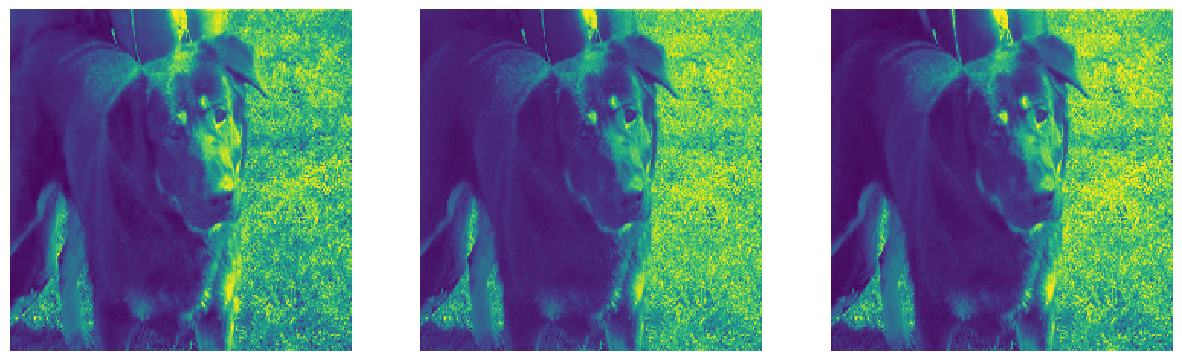

Layer 2 activations


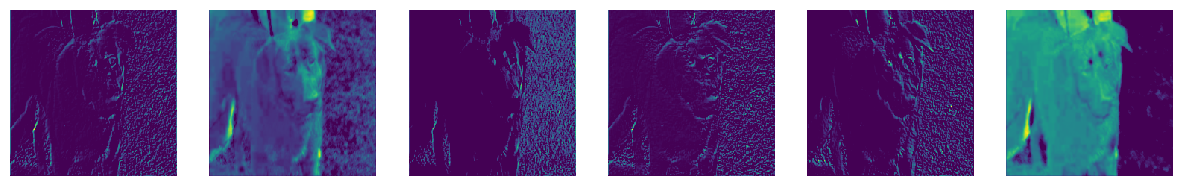

Layer 3 activations


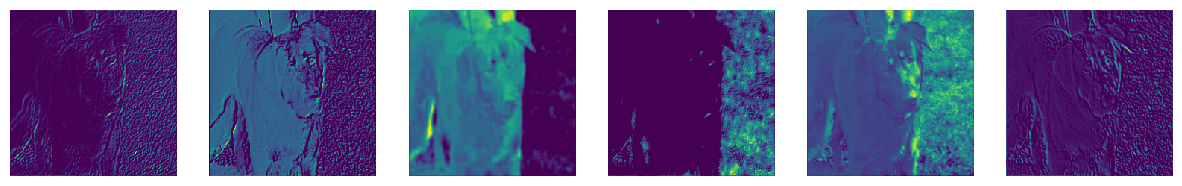

Layer 4 activations


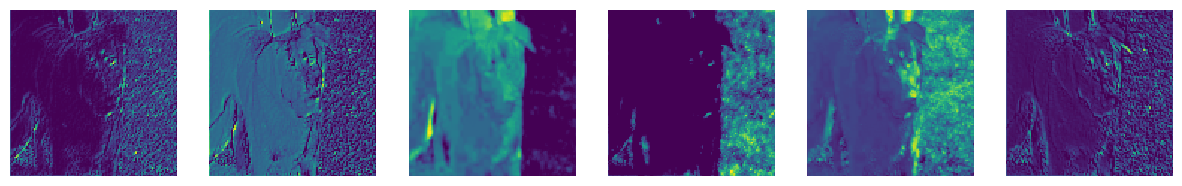

Layer 5 activations


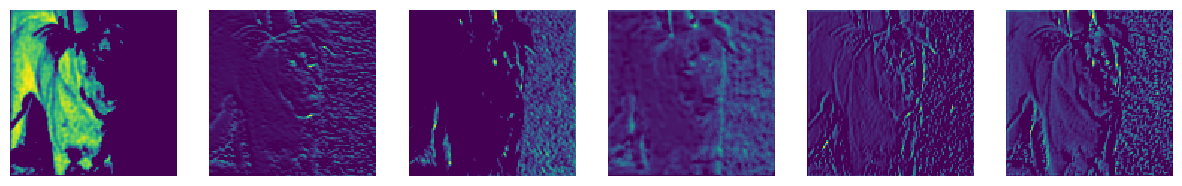

Layer 6 activations


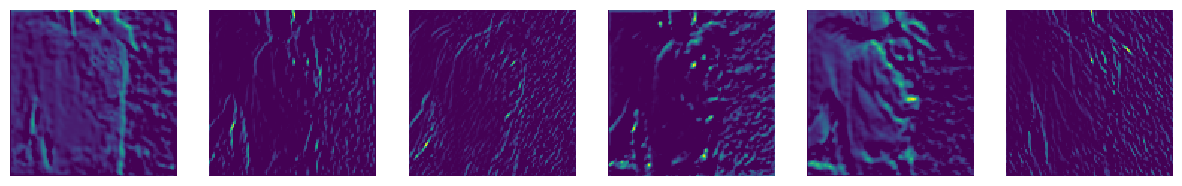

Layer 7 activations


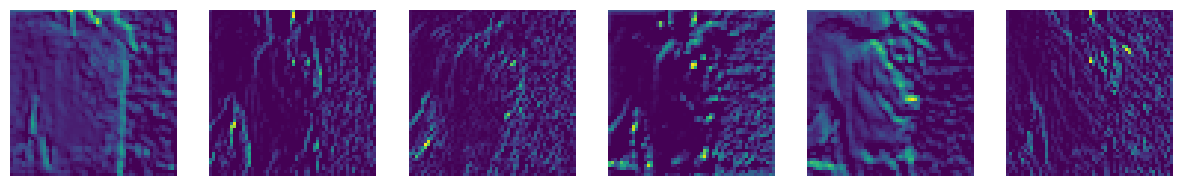

Layer 8 activations


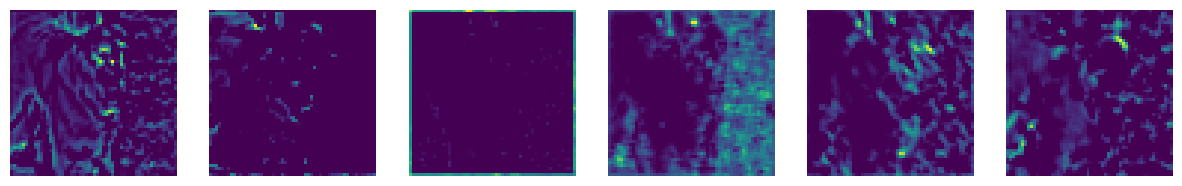

Layer 9 activations


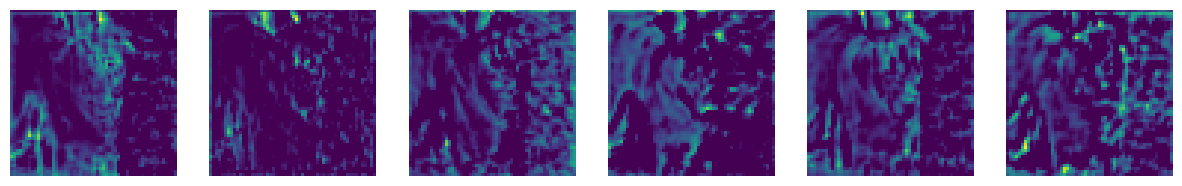

Layer 10 activations


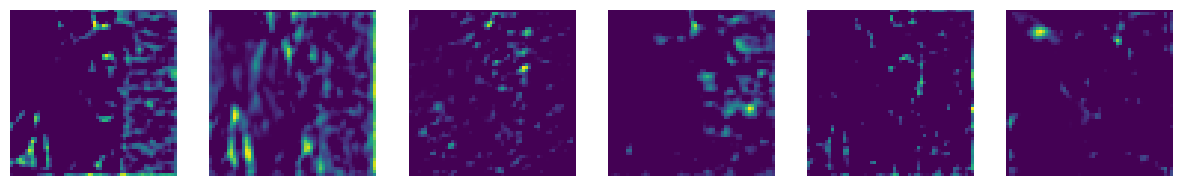

In [19]:
import matplotlib.pyplot as plt

def display_activation(activations, layer_index, num_filters=6):
    activation = activations[layer_index]
    num_filters = min(num_filters, activation.shape[-1])  # Limit number of filters for visualization

    fig, axes = plt.subplots(1, num_filters, figsize=(15, 15))
    for i in range(num_filters):
        ax = axes[i]
        ax.matshow(activation[0, :, :, i], cmap='viridis')  # Plot each filter output
        ax.axis('off')
    plt.show()

# Visualize activations of each layer (e.g., first 5 layers)
for i, layer_activation in enumerate(activations[:10]):
    print(f"Layer {i+1} activations")
    display_activation(activations, i, num_filters=6)  # Adjust num_filters as needed


In [24]:
model2 = load_model('vgg16_2.keras')


In [28]:
# Use only the first few layers for testing (e.g., first 5 layers)
layer_outputs = [layer.output for layer in model2.layers[:5]]
activation_model = Model(inputs=model2.input, outputs=layer_outputs)

try:
    activations = activation_model.predict(img_array)
    print("Activations for the first few layers obtained successfully.")
except Exception as e:
    print("Error when getting activations:", e)


Error when getting activations: 'Exception encountered when calling Functional.call().\n\n\x1b1718431597232\x1b\n\nArguments received by Functional.call():\n  • inputs=tf.Tensor(shape=(1, 224, 224, 3), dtype=float32)\n  • training=False\n  • mask=None'


Layer 1 activations


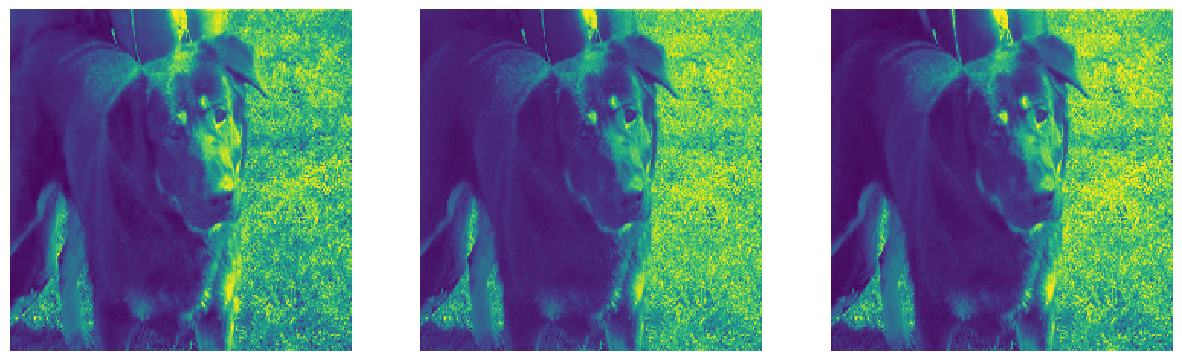

Layer 2 activations


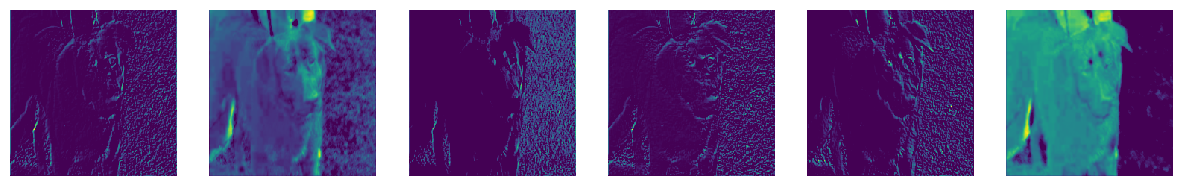

Layer 3 activations


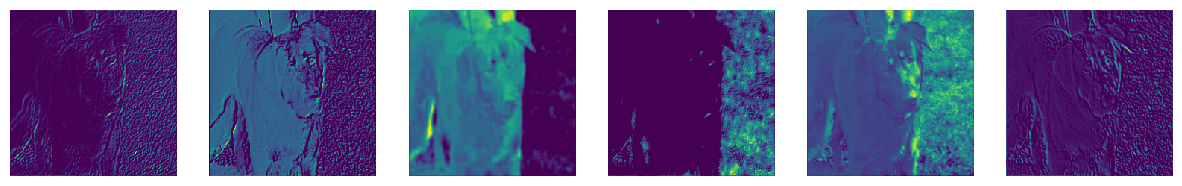

Layer 4 activations


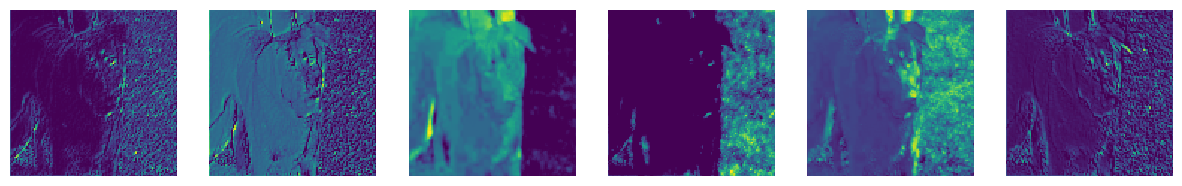

Layer 5 activations


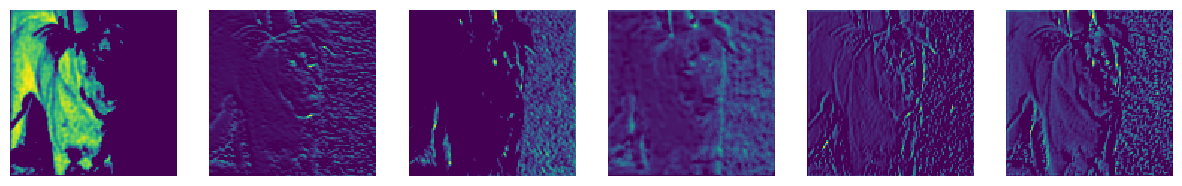

Layer 6 activations


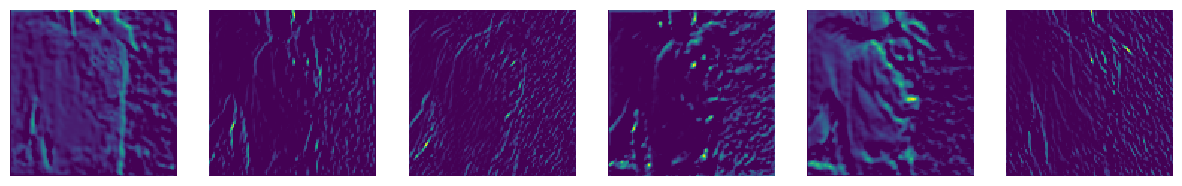

Layer 7 activations


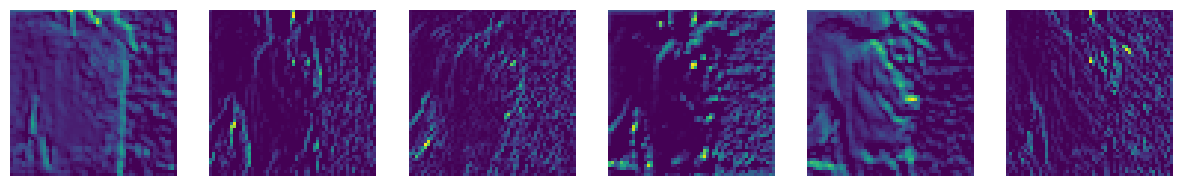

Layer 8 activations


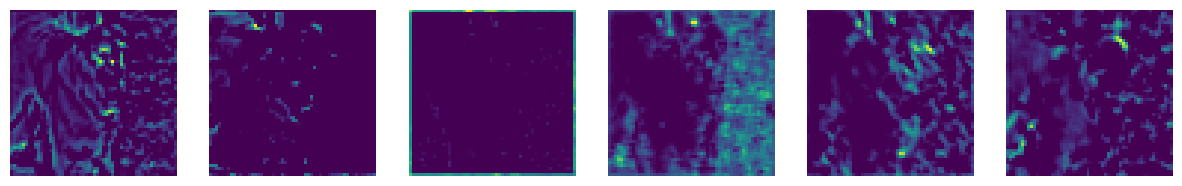

Layer 9 activations


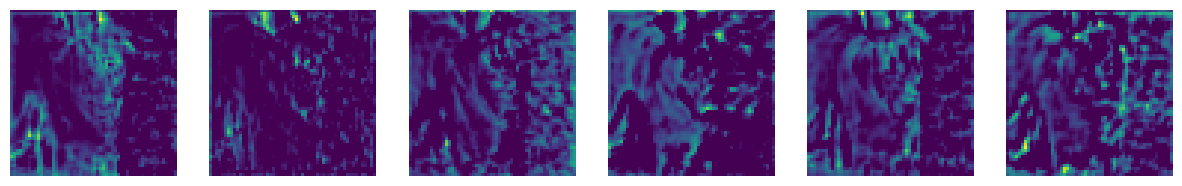

Layer 10 activations


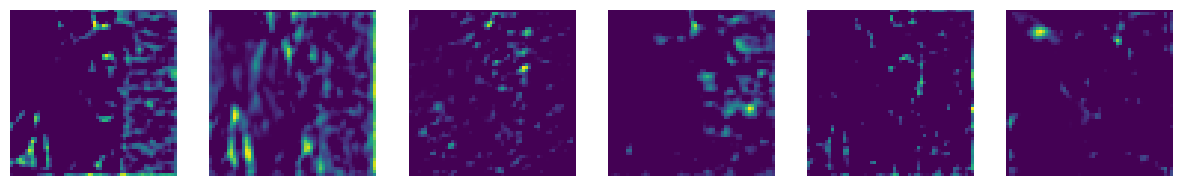

In [29]:
import matplotlib.pyplot as plt

def display_activation(activations, layer_index, num_filters=6):
    activation = activations[layer_index]
    num_filters = min(num_filters, activation.shape[-1])  # Limit number of filters for visualization

    fig, axes = plt.subplots(1, num_filters, figsize=(15, 15))
    for i in range(num_filters):
        ax = axes[i]
        ax.matshow(activation[0, :, :, i], cmap='viridis')  # Plot each filter output
        ax.axis('off')
    plt.show()

# Visualize activations of each layer (e.g., first 5 layers)
for i, layer_activation in enumerate(activations[:10]):
    print(f"Layer {i+1} activations")
    display_activation(activations, i, num_filters=6)  # Adjust num_filters as needed


In [30]:
model3=load_model('vgg16.keras')

In [32]:
# Use only the first few layers for testing (e.g., first 5 layers)
layer_outputs = [layer.output for layer in model3.layers[:5]]
activation_model = Model(inputs=model3.input, outputs=layer_outputs)

Layer 1 activations


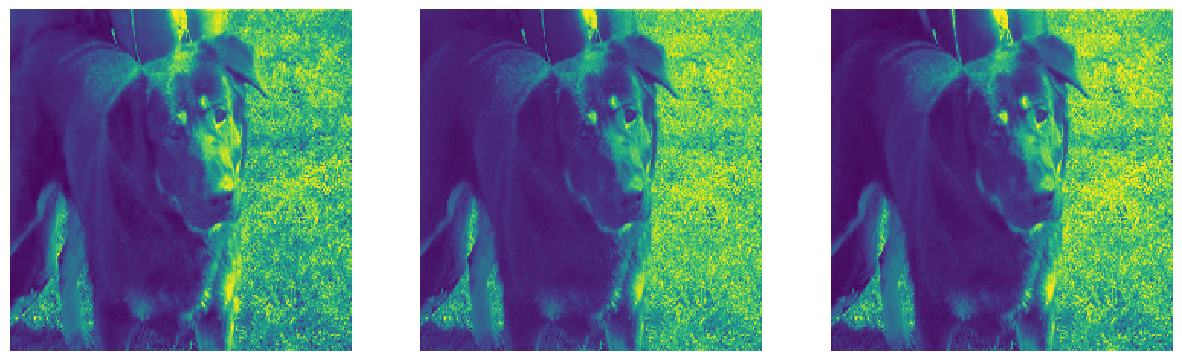

Layer 2 activations


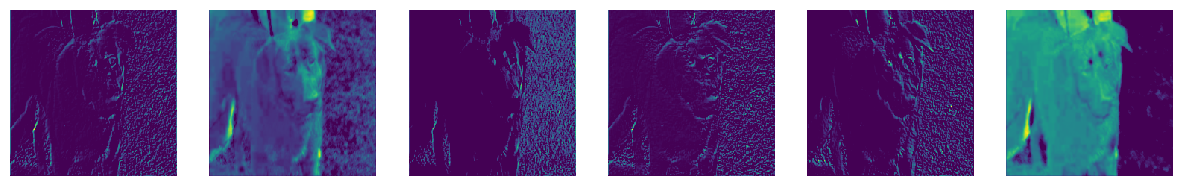

Layer 3 activations


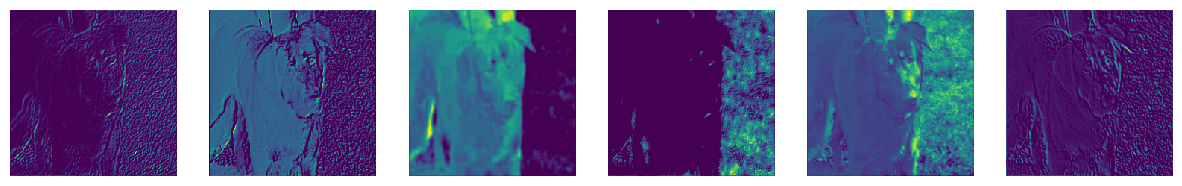

Layer 4 activations


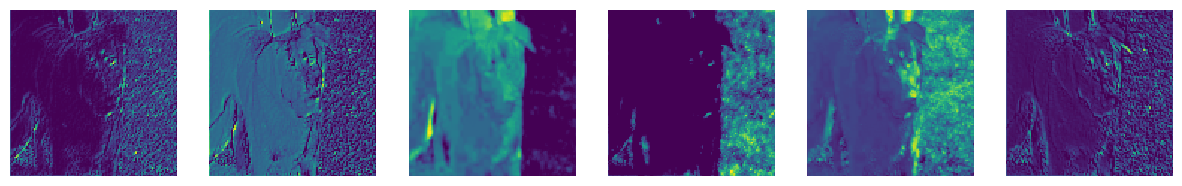

Layer 5 activations


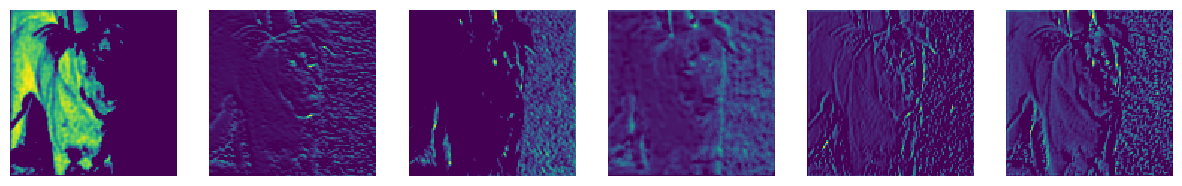

Layer 6 activations


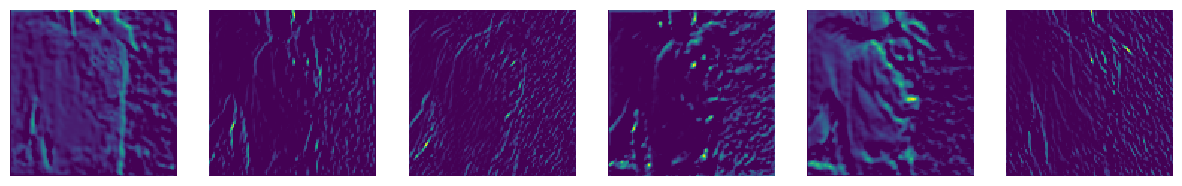

Layer 7 activations


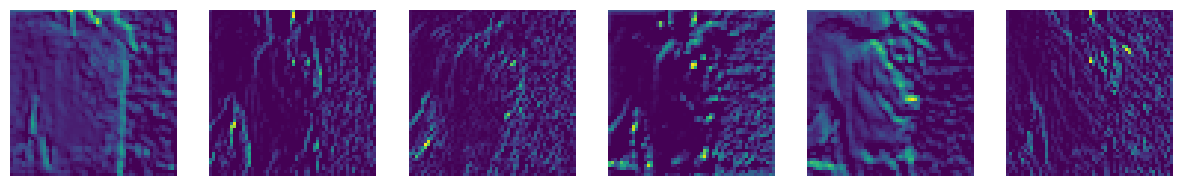

Layer 8 activations


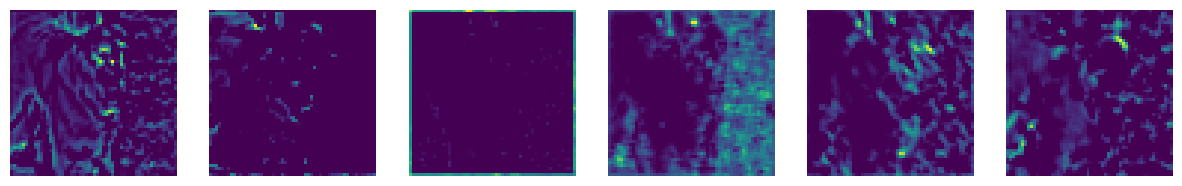

Layer 9 activations


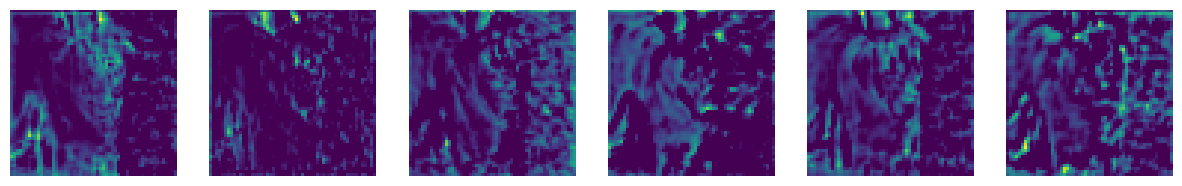

Layer 10 activations


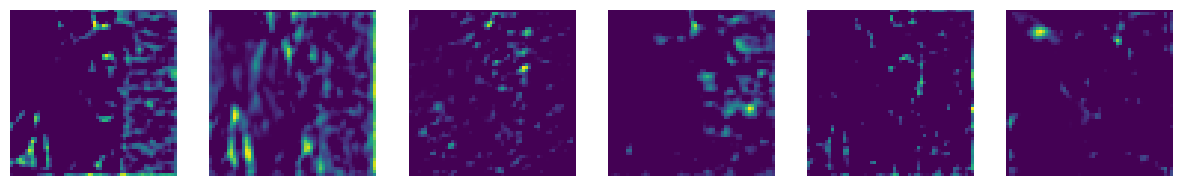

In [33]:
import matplotlib.pyplot as plt

def display_activation(activations, layer_index, num_filters=6):
    activation = activations[layer_index]
    num_filters = min(num_filters, activation.shape[-1])  # Limit number of filters for visualization

    fig, axes = plt.subplots(1, num_filters, figsize=(15, 15))
    for i in range(num_filters):
        ax = axes[i]
        ax.matshow(activation[0, :, :, i], cmap='viridis')  # Plot each filter output
        ax.axis('off')
    plt.show()

# Visualize activations of each layer (e.g., first 5 layers)
for i, layer_activation in enumerate(activations[:10]):
    print(f"Layer {i+1} activations")
    display_activation(activations, i, num_filters=6)  # Adjust num_filters as needed